# Хроники замерзающего телескопа 06 февраля 2021

In [2]:
!pwd
!date
!ls *.dat

/home/alena/SCIENCE/SIT/Analysis/Telemetry
Ср фев 10 12:33:12 MSK 2021
2020_12_29_all_dbg_params.dat  2021_02_part_all_dbg_params.dat
2020_12_all_dbg_params.dat


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [4]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [5]:
filename = "2021_02_part_all_dbg_params.dat"
data = pd.read_csv(filename, index_col=None, sep='\s+')
print(data.shape)
print(data.columns)
data.head()

(19598, 20)
Index(['year', 'month', 'day', 'time', 'P0', 'T0', 'P1', 'T1', 'Tmos', 'Umos',
       'Imos', 'Tpow', 'U5', 'Uac', 'Icom', 'Tbot', 'Ttop', 'Freq', 'Num',
       'flight'],
      dtype='object')


,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,Imos,Tpow,U5,Uac,Icom,Tbot,Ttop,Freq,Num,flight
0,2021,1,22,22:57:38,93.81,25.5,93.52,-23.6,-14.6,0.0,0.010,38.00,5.16,18.93,0.83,27.3,23.3,1.0,122.0,NaN
1,2021,1,22,22:58:39,93.82,25.5,93.52,-23.6,-14.6,0.0,0.000,37.00,5.16,18.92,0.84,27.0,23.3,2.0,122.0,NaN
2,2021,1,22,22:59:40,93.83,25.5,93.54,-23.5,-14.7,0.0,0.005,37.25,5.16,18.93,0.83,26.8,23.3,3.0,122.0,NaN
3,2021,1,22,23:00:41,93.82,25.4,93.53,-23.5,-14.6,0.0,0.000,37.25,5.16,18.93,0.84,26.6,23.1,4.0,122.0,NaN
4,2021,1,22,23:01:42,93.81,25.4,93.55,-23.5,-14.6,0.0,0.005,37.25,5.16,18.93,0.83,26.5,23.1,5.0,122.0,NaN


## Plot

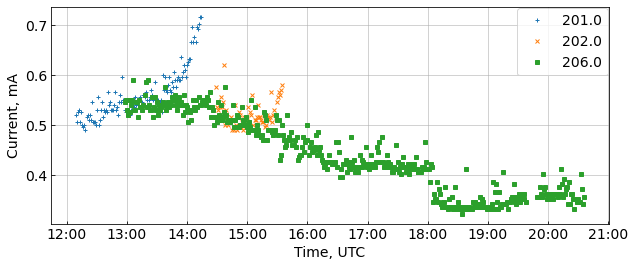

In [6]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        fig, ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=key)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Imos", "Current, mA")    

## Plot shared axis

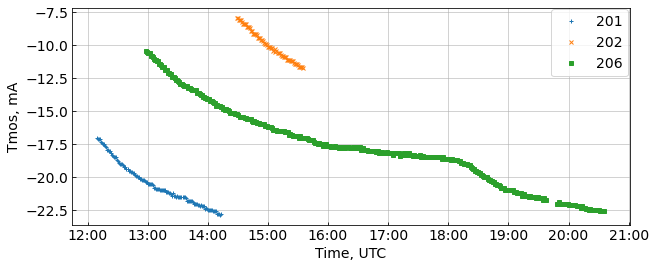

In [7]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=str(int(key)))
        i += 1

    plt.xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    ax.legend(borderaxespad=0.1)
    ax.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Tmos", "Tmos, mA")    

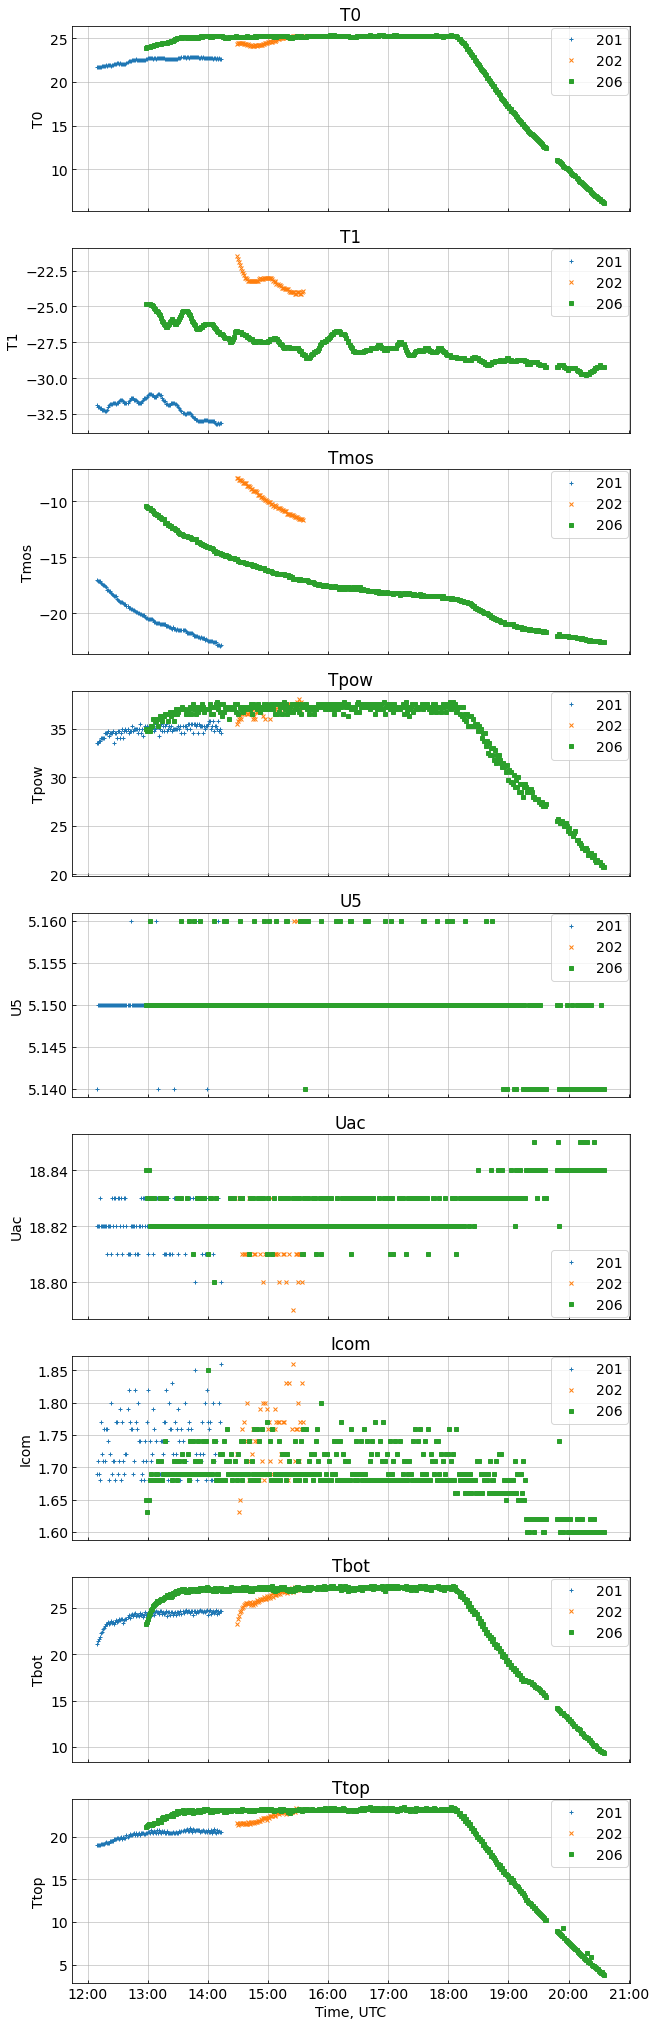

In [9]:
params = data.columns[4:-2]
params = ['T0', 'T1', 'Tmos', 'Tpow', 'U5', 'Uac', 'Icom', 'Tbot', 'Ttop']
figs = len(params)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 4*figs))

for i, param in enumerate(params):
    plot_by_days(data, param, param, param, axn[i]) 
plt.savefig("2021_02_06_sit_freezing.png", dpi=300,  bbox_inches='tight')